# Table of Contents
<a id="table-of-contents"></a>


- [Research Problem Statement](#Research-Problem-Statement)

- [Data Preparation and Preprocessing](#Data-Preparation-and-Preprocessing)
 
- [Data Cleaning and Encoding](#Data-Cleaning-and-Encoding)
 
- [Analyze Data Imbalance](#Analyze-Data-Imbalance)

- [Data Scaling](#Data-Scaling)
 
- [Data Modeling](#Baseline-Model)
  
  


# Research Problem Statement

Financial organizations in todays world faces several challenges in identifying, measuring and managing financial risks that could impact their profitability and sustainability.Our goal is to help identify financial risks affecting organizations and help them make better, informed and profitable decisions based on data driven insights. 


[🔼 Back to Table of Contents](#table-of-contents)


# Data Preparation and Preprocessing

### About Dataset
**Synthetic Dataset for Risk Assessment and Loan Approval Modeling**
<br>This synthetic dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment. It serves two primary purposes:

**Risk Score Regression:** To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.

**Binary Classification:** To determine the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making. we will use dataset and make a model which will help financial organizations make informed decision for loan approval

In [49]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV

import datetime

# Set seed
random_state = 42
Results=[]

#### Access the Data

In [50]:
#read data
pd.set_option('display.max_columns',None)
raw_df = pd.read_csv('Loan.csv')

In [51]:
# make copy of data so we will not change original data 
df = raw_df.copy()


#### Explore the Data

In [52]:
#displaying dataset
df.head(10)

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,2,Own,183,0.354418,1,2,0.358336,0,Home,0,29,9,7632,1202,146111,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,1,Mortgage,496,0.087827,5,3,0.330274,0,Debt Consolidation,0,21,9,4627,3460,53204,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,Rent,902,0.137414,2,0,0.244729,0,Education,0,20,22,886,895,25176,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,1,Mortgage,755,0.267587,2,1,0.436244,0,Home,0,27,10,1675,1217,104822,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,1,Mortgage,274,0.320535,0,0,0.078884,0,Debt Consolidation,0,26,27,1555,4981,244305,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
5,2018-01-06,37,178310,626,Self-Employed,Master,16,15433,72,Married,0,Rent,732,0.102211,5,1,0.259366,0,Debt Consolidation,1,16,19,2118,1223,67914,40843,14859.166667,0.756079,5,27071,0.217433,0.217601,385.577074,0.075211,1,44.0
6,2018-01-07,58,51250,564,Employed,High School,39,12741,48,Married,0,Rent,337,0.367380,6,1,0.127473,0,Other,0,21,18,5161,1735,65624,43894,4270.833333,0.884275,5,21730,0.225741,0.205271,391.300352,0.170529,0,50.0
7,2018-01-08,49,97345,516,Employed,High School,23,19634,12,Divorced,5,Mortgage,288,0.209768,5,0,0.395568,0,Other,0,19,11,781,74,50177,11556,8112.083333,0.933492,5,38621,0.226634,0.209113,1827.360055,0.260767,1,42.4
8,2018-01-09,34,116841,603,Employed,Bachelor,12,55353,60,Divorced,5,Own,638,0.192701,3,0,0.313233,1,Debt Consolidation,0,25,29,1157,708,29632,49940,9736.750000,0.728397,3,7711,0.258853,0.291539,1762.199026,0.246509,0,61.0
9,2018-01-10,46,40615,612,Employed,Associate,19,25443,12,Married,4,Other,704,0.512465,3,2,0.505148,0,Other,0,23,10,1028,446,129664,12852,3384.583333,0.615323,3,116812,0.184443,0.197271,2353.577424,0.903384,0,53.0


#### Basic Summary Statistics

In [53]:
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,0.993000,0.285735,0.052400,0.100050,23.993650,14.957300,4946.052150,1782.555100,9.696440e+04,3.625241e+04,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,0.986965,0.160211,0.222838,0.300074,4.945436,8.371552,6604.887477,2245.378812,1.207999e+05,4.725151e+04,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,0.000000,0.001720,0.000000,0.000000,8.000000,1.000000,73.000000,24.000000,2.098000e+03,3.720000e+02,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,0.000000,0.161035,0.000000,0.000000,21.000000,8.000000,1541.750000,551.000000,3.118025e+04,1.119675e+04,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,1.000000,0.264454,0.000000,0.000000,24.000000,15.000000,2986.000000,1116.000000,6.069900e+04,2.220300e+04,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,2.000000,0.390327,0.000000,0.000000,27.000000,22.000000,5873.250000,2126.000000,1.174052e+05,4.314650e+04,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,7.000000,0.902253,1.000000,1.000000,45.000000,29.000000,200089.000000,52572.000000,2.619627e+06,1.417302e+06,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


#### Information about dataset

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

### Shape of Dataset

In [55]:
df.shape

(20000, 36)

### Dataset Summary

Columns Summary 
1. Application & Demographics

ApplicationDate (object) – The date when the loan application was submitted.

Age (int) – Applicant’s age in years.

MaritalStatus (object) – Applicant’s marital status (e.g., Single, Married, Divorced).

NumberOfDependents (int) – Number of financial dependents supported by the applicant.

2. Education & Employment

EducationLevel (object) – Highest educational qualification (e.g., High School, Bachelor, Master).

EmploymentStatus (object) – Current employment status (e.g., Employed, Unemployed, Self-employed).

Experience (int) – Number of years of work experience.

JobTenure (int) – Number of years the applicant has been in their current job.

3. Financial Information

AnnualIncome (int) – Annual income of the applicant.

MonthlyIncome (float) – Derived monthly income.

SavingsAccountBalance (int) – Balance in the applicant’s savings account.

CheckingAccountBalance (int) – Balance in the applicant’s checking account.

TotalAssets (int) – Value of all assets owned by the applicant.

TotalLiabilities (int) – Total liabilities (loans, debts, obligations).

NetWorth (int) – Net worth = TotalAssets – TotalLiabilities.

4. Credit History & Debt

CreditScore (int) – Applicant’s credit score (indicator of creditworthiness).

LengthOfCreditHistory (int) – Number of years since the applicant first opened a credit account.

NumberOfOpenCreditLines (int) – Active credit accounts.

NumberOfCreditInquiries (int) – Recent credit inquiries made by lenders.

CreditCardUtilizationRate (float) – Percentage of available credit currently being used.

DebtToIncomeRatio (float) – Ratio of total debt to annual income.

TotalDebtToIncomeRatio (float) – Includes monthly loan obligations + debts compared to income.

MonthlyDebtPayments (int) – Regular monthly debt obligations.

UtilityBillsPaymentHistory (float) – Payment record for utility bills (scaled score).

PaymentHistory (int) – Credit repayment history (e.g., on-time payments, defaults).

BankruptcyHistory (int) – Indicator if applicant has declared bankruptcy in the past.

PreviousLoanDefaults (int) – Indicator if applicant defaulted on previous loans.

5. Loan Details

LoanAmount (int) – Amount of money requested by the applicant.

LoanDuration (int) – Duration of the loan in months.

LoanPurpose (object) – Purpose of the loan (e.g., Education, Home, Car, Business).

BaseInterestRate (float) – Starting interest rate before adjustments.

InterestRate (float) – Final loan interest rate assigned to the applicant.

MonthlyLoanPayment (float) – Monthly payment amount for the loan.

HomeOwnershipStatus (object) – Applicant’s housing situation (Own, Rent, Mortgage).

6. Target / Outcome Variables

LoanApproved (int) – Target variable (1 = Approved, 0 = Rejected).

RiskScore (float) – Predicted financial risk score (higher = riskier applicant).

[🔼 Back to Table of Contents](#table-of-contents)


### Analyze Data Missingness
 No changes for missingness: In our analysis, we confirmed that there are no missing values in any of the columns in dataset.

<Axes: >

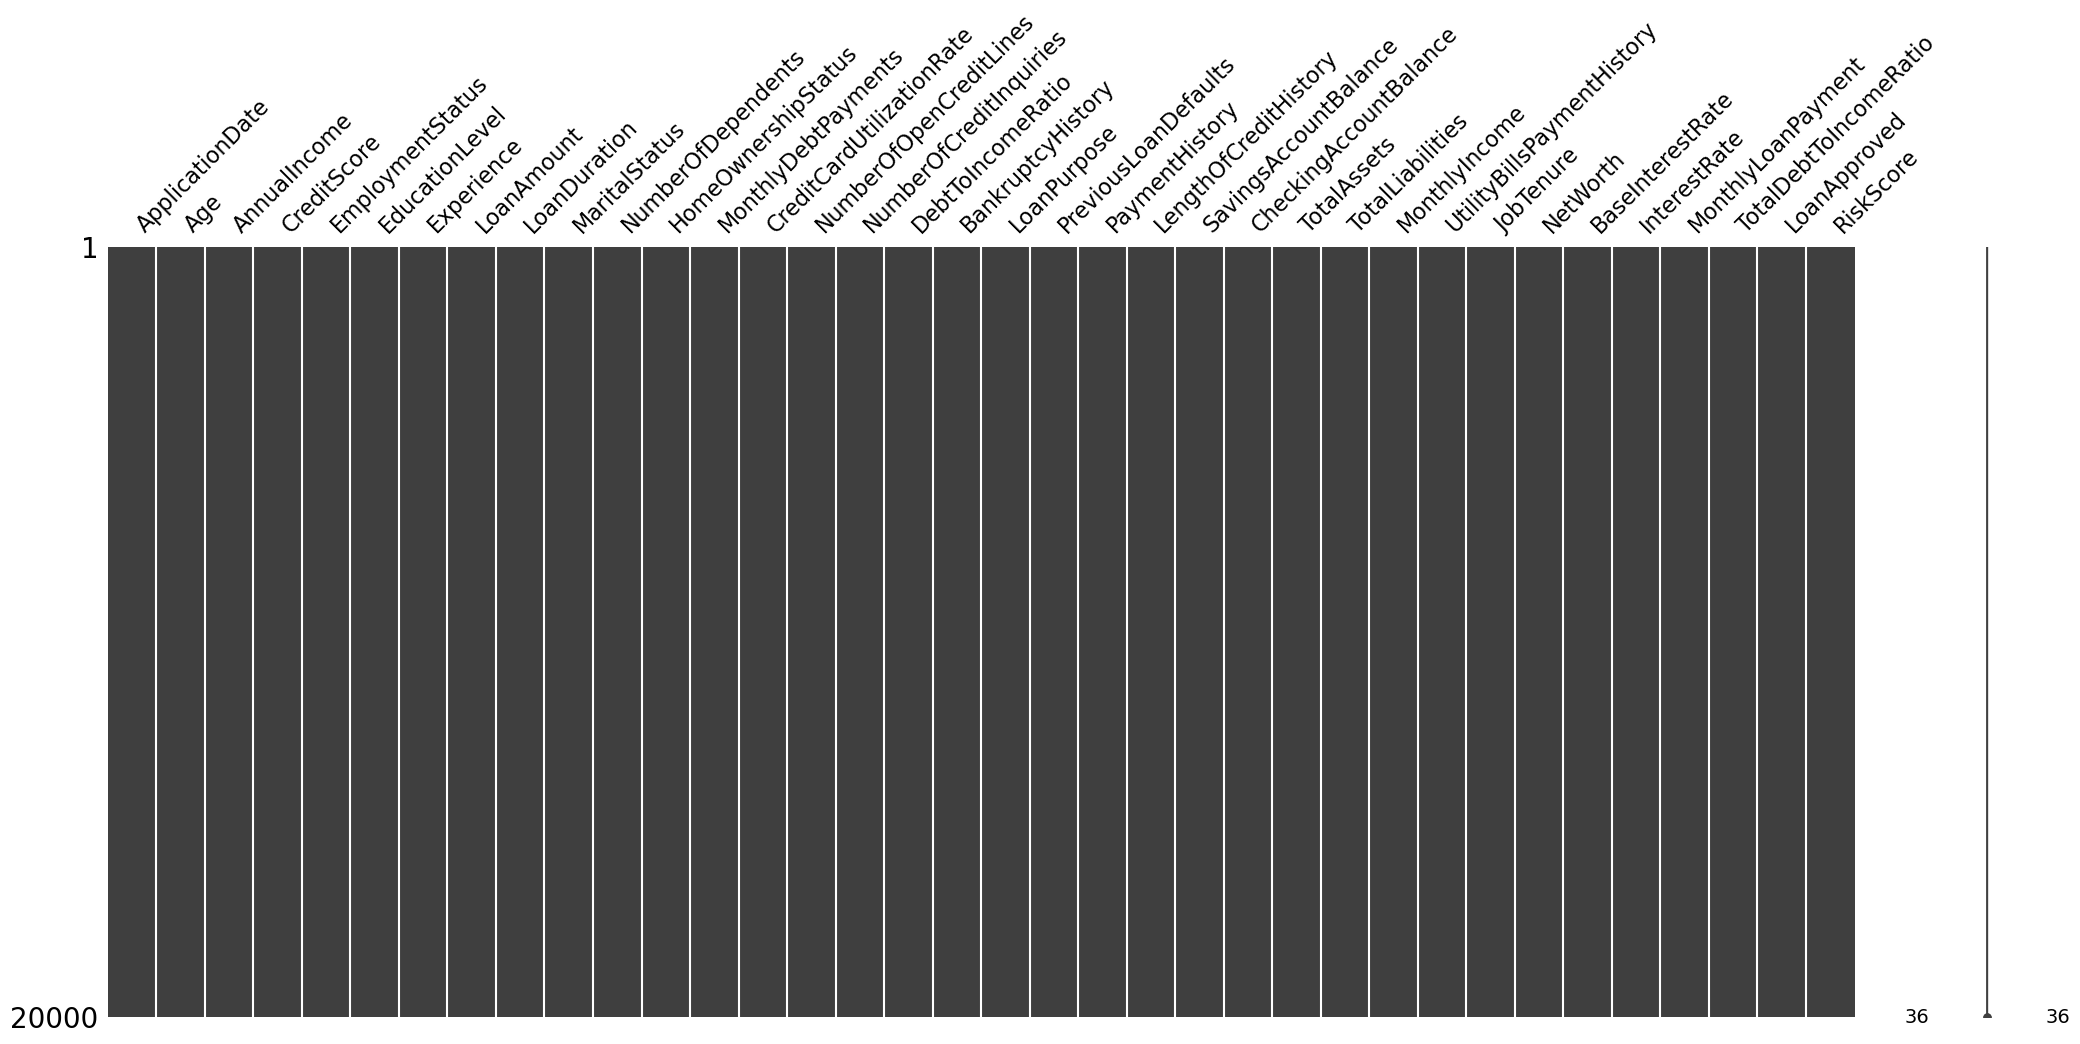

In [56]:
msno.matrix(df)



ApplicationDate column in our dataset contains over 17500 rows with future dates, which is not feasible or realistic in a real-world scenario. Since this dataset is synthetic, the presence of these future dates does not provide meaningful information and could potentially introduce noise or mislead the analysis so removing the ApplicationDate column entirely from the dataset.

In [57]:
# Convert 'ApplicationDate' column to datetime format
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'], errors='coerce')

# Get today's date
today = datetime.datetime.today()

# Filter rows where 'ApplicationDate' is greater than today's date
(df[df['ApplicationDate'] > today]).shape

(17182, 36)

In [58]:
# Drop ApplicationDate column
df = df.drop(columns=['ApplicationDate'])

[🔼 Back to Table of Contents](#table-of-contents)


#### Histograms of Data Distribution and Outliers

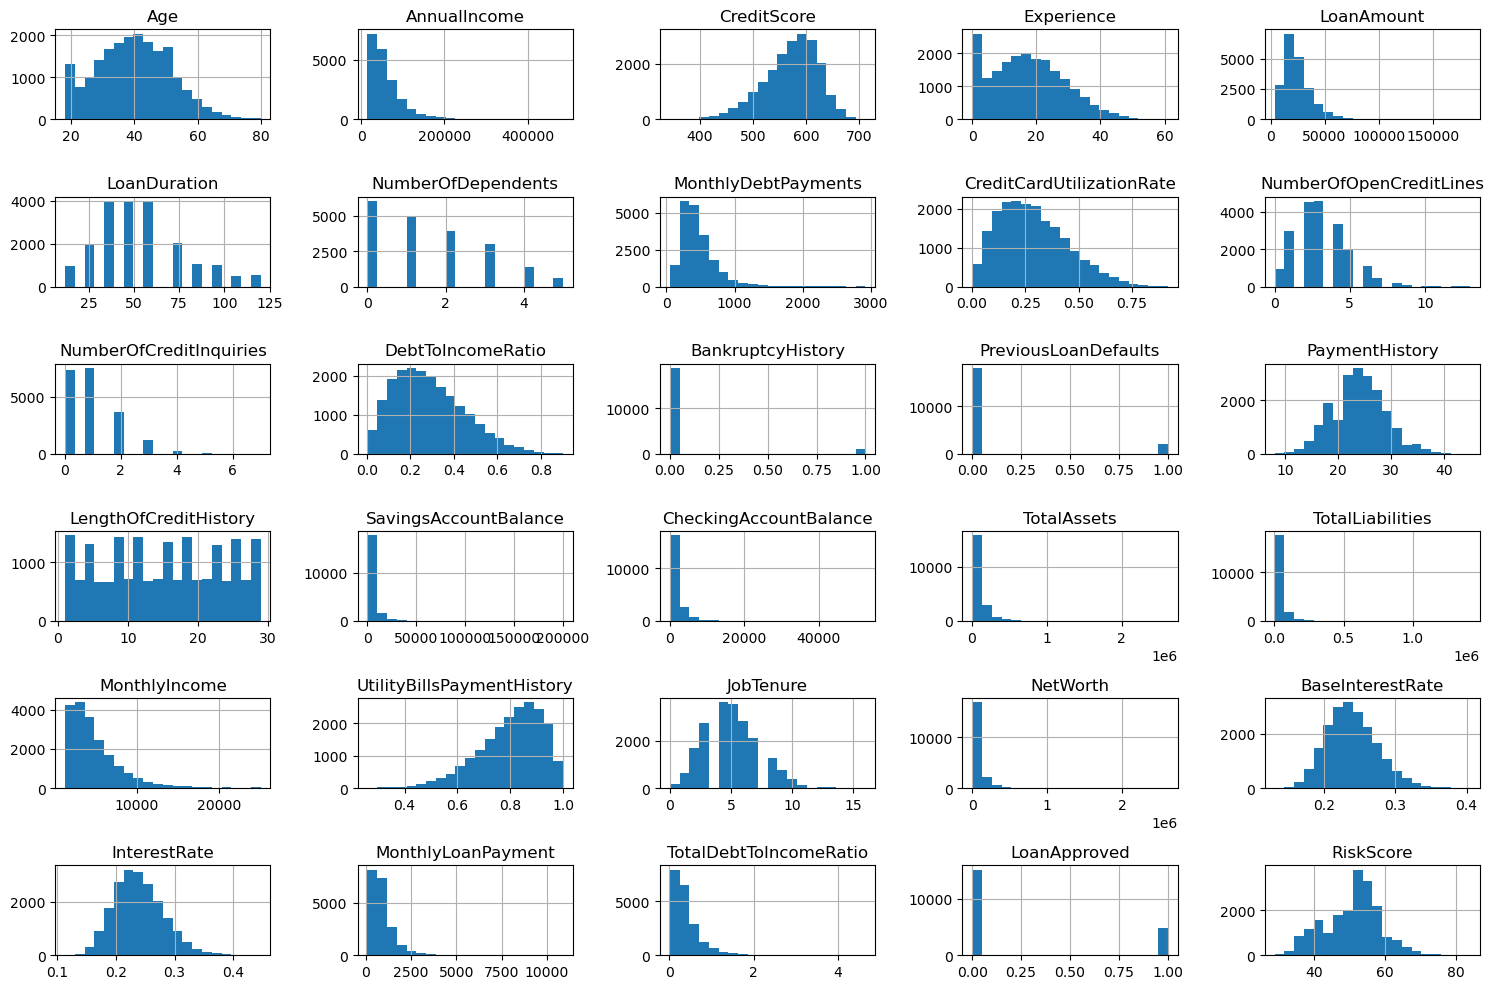

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# histograms for the continuous varibles
raw_df.hist(bins=20, figsize=(15, 10))  
plt.tight_layout()
plt.show()

### Histogram for detecting outliers

Several variables contain outliers, as shown in the boxplots. This suggests that some variables have values outside of the typical range, indicating high variability. Notable examples include:
- **Annual Income, Loan Amount, Total Assets, Credit Score:** These variables show outliers above the typical range, suggesting that some individuals have significantly higher incomes or are borrowing larger amounts (e.g., jumbo loans).
- **Credit Score and Utility Bill Payment History:** While most credit scores fell between 450-750, there are some observations below 400.

The presence of outliers in financial-related variables can indicate specific risk factors or anomalies, such as unusually high or low borrowing amounts. we will not remove outliers in this project for simplicity.

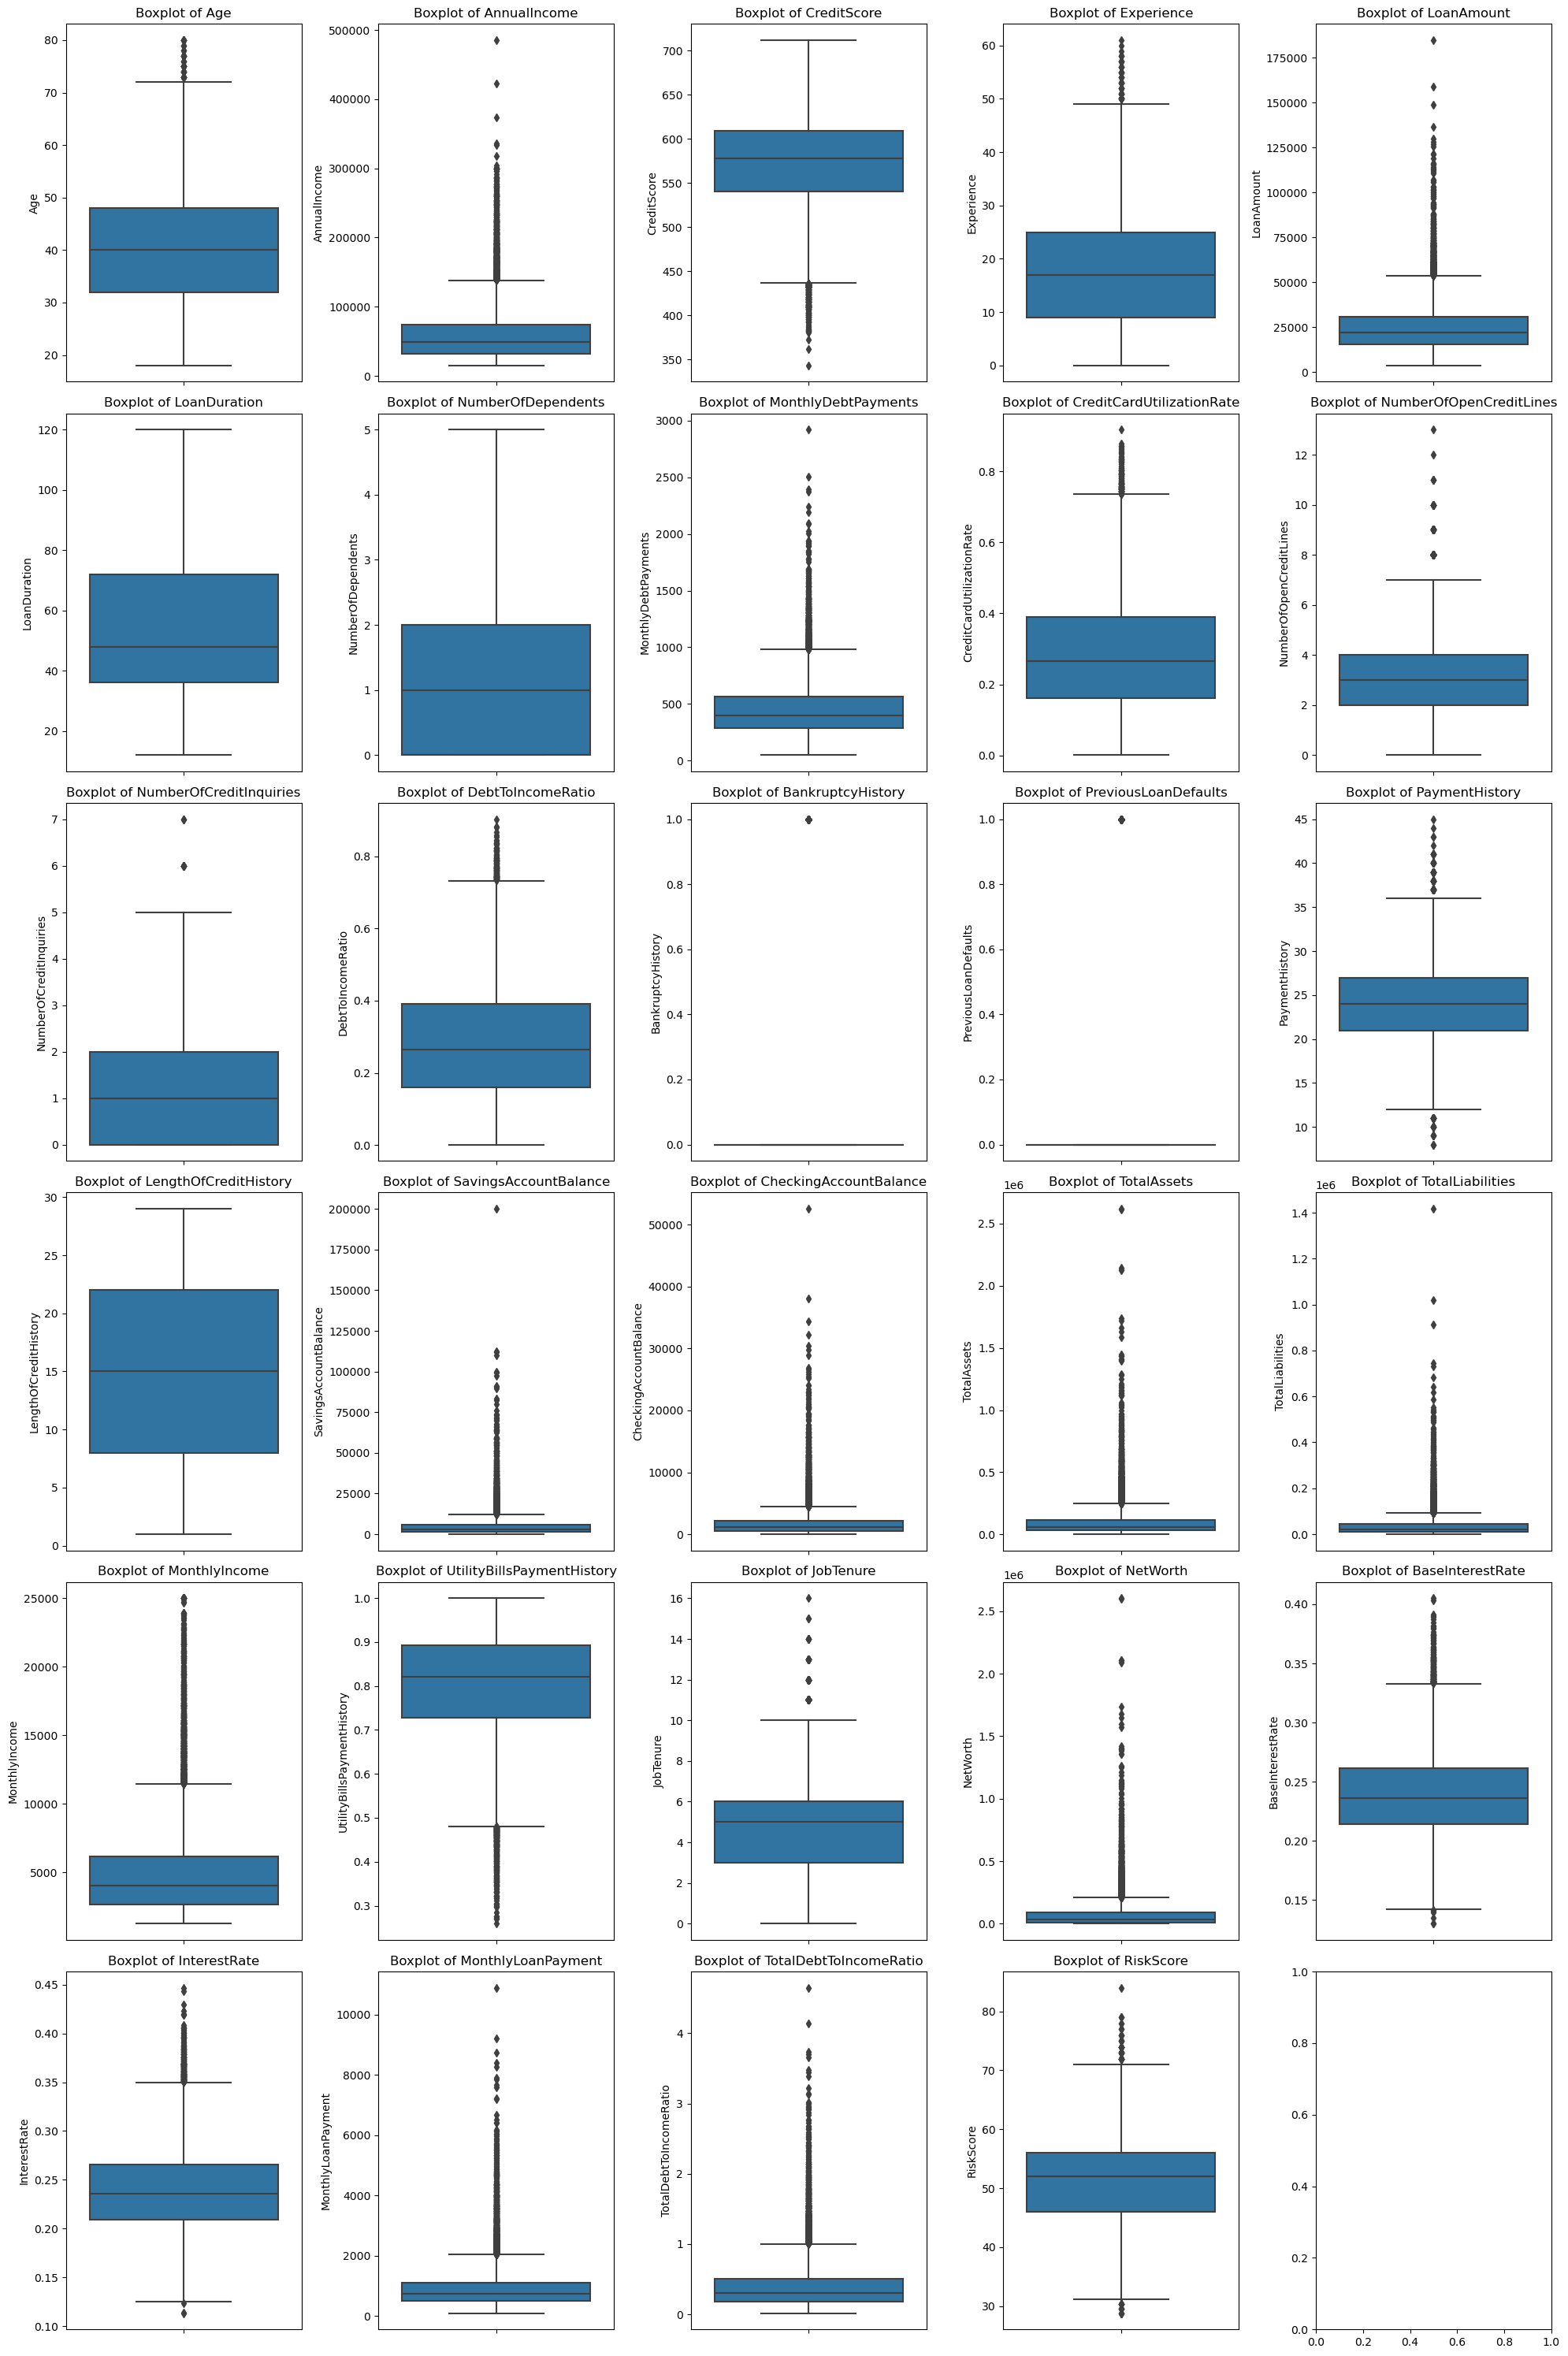

In [60]:
# outliers
fig, axes = plt.subplots(6, 5, figsize=(20, 30))
columns_to_plot = raw_df.select_dtypes(include='number').columns
columns_to_plot =[col for col in columns_to_plot if col not in [ 'LoanApproved']]
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.boxplot(data=raw_df, y=col, ax=axes[i])  
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()  # Adjust spacing
plt.show()


[🔼 Back to Table of Contents](#table-of-contents)


## Data Cleaning and Encoding

### Data Cleaning

In [61]:
# Update column headers to lowercase and remove spaces
df.columns = df.columns.str.lower().str.replace(' ', '')

### Encoding

In [62]:
cat_cols = ['employmentstatus', 'educationlevel', 'maritalstatus','homeownershipstatus', 'bankruptcyhistory',
            'loanpurpose', 'previousloandefaults']
unique_values = {col: df[col].unique() for col in cat_cols}


for col, values in unique_values.items():
    print(f"Unique values in {col}: {values}")

Unique values in employmentstatus: ['Employed' 'Self-Employed' 'Unemployed']
Unique values in educationlevel: ['Master' 'Associate' 'Bachelor' 'High School' 'Doctorate']
Unique values in maritalstatus: ['Married' 'Single' 'Divorced' 'Widowed']
Unique values in homeownershipstatus: ['Own' 'Mortgage' 'Rent' 'Other']
Unique values in bankruptcyhistory: [0 1]
Unique values in loanpurpose: ['Home' 'Debt Consolidation' 'Education' 'Other' 'Auto']
Unique values in previousloandefaults: [0 1]


In [63]:
education_mapping = {
    'Master': 0,
    'Associate': 1,
    'Bachelor': 2,
    'High School': 3,
    'Doctorate': 4
}
df['educationlevelencoded'] = df['educationlevel'].map(education_mapping)
df = df.drop('educationlevel', axis=1)
cat_cols.remove('educationlevel')

In [64]:
# cat_one_hot_encoded = pd.get_dummies(df[cat_cols], drop_first=True)  # drop_first=True to avoid dummy variable trap
df = pd.get_dummies(df, columns=cat_cols, drop_first=True,dtype='int')
# Update column headers to lowercase and remove spaces
df.columns = df.columns.str.lower().str.replace(' ', '')

In [65]:
 display(df.head(10))
display(df.shape)

,age,annualincome,creditscore,experience,loanamount,loanduration,numberofdependents,monthlydebtpayments,creditcardutilizationrate,numberofopencreditlines,numberofcreditinquiries,debttoincomeratio,paymenthistory,lengthofcredithistory,savingsaccountbalance,checkingaccountbalance,totalassets,totalliabilities,monthlyincome,utilitybillspaymenthistory,jobtenure,networth,baseinterestrate,interestrate,monthlyloanpayment,totaldebttoincomeratio,loanapproved,riskscore,educationlevelencoded,employmentstatus_self-employed,employmentstatus_unemployed,maritalstatus_married,maritalstatus_single,maritalstatus_widowed,homeownershipstatus_other,homeownershipstatus_own,homeownershipstatus_rent,bankruptcyhistory_1,loanpurpose_debtconsolidation,loanpurpose_education,loanpurpose_home,loanpurpose_other,previousloandefaults_1
0,45,39948,617,22,13152,48,2,183,0.354418,1,2,0.358336,29,9,7632,1202,146111,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
1,38,39709,628,15,26045,48,1,496,0.087827,5,3,0.330274,21,9,4627,3460,53204,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,47,40724,570,26,17627,36,2,902,0.137414,2,0,0.244729,20,22,886,895,25176,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0,2,0,0,1,0,0,0,0,1,0,0,1,0,0,0
3,58,69084,545,34,37898,96,1,755,0.267587,2,1,0.436244,27,10,1675,1217,104822,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,37,103264,594,17,9184,36,1,274,0.320535,0,0,0.078884,26,27,1555,4981,244305,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,37,178310,626,16,15433,72,0,732,0.102211,5,1,0.259366,16,19,2118,1223,67914,40843,14859.166667,0.756079,5,27071,0.217433,0.217601,385.577074,0.075211,1,44.0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1
6,58,51250,564,39,12741,48,0,337,0.367380,6,1,0.127473,21,18,5161,1735,65624,43894,4270.833333,0.884275,5,21730,0.225741,0.205271,391.300352,0.170529,0,50.0,3,0,0,1,0,0,0,0,1,0,0,0,0,1,0
7,49,97345,516,23,19634,12,5,288,0.209768,5,0,0.395568,19,11,781,74,50177,11556,8112.083333,0.933492,5,38621,0.226634,0.209113,1827.360055,0.260767,1,42.4,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,34,116841,603,12,55353,60,5,638,0.192701,3,0,0.313233,25,29,1157,708,29632,49940,9736.750000,0.728397,3,7711,0.258853,0.291539,1762.199026,0.246509,0,61.0,2,0,0,0,0,0,0,1,0,1,1,0,0,0,0
9,46,40615,612,19,25443,12,4,704,0.512465,3,2,0.505148,23,10,1028,446,129664,12852,3384.583333,0.615323,3,116812,0.184443,0.197271,2353.577424,0.903384,0,53.0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0


(20000, 43)

[🔼 Back to Table of Contents](#table-of-contents)


### Coorelation Matrix

Correlations Between Independent and Dependent Variables:**  
The correlation heatmap displays the relationships between features in the dataset. Correlation values range from -1 to 1, where 0 indicates no relationship. Key findings include:

1. **Annual Income and LoanApproved:** Correlation of **0.598**, indicating a strong positive relationship.
2. **Monthly Income and LoanApproved:** Correlation of **0.604**, also indicating a strong positive relationship.
3. **Total Debt-to-Income Ratio and LoanApproved:** Correlation of **-0.410**, indicating a strong negative relationship.
4. **Interest Rate and LoanApproved:** Correlation of **-0.302**, indicating a negative relationship.
5. **Age, Experience, Credit Score, Length of Credit History, Total Assets, Net Worth:** These variables show weaker positive correlations (~0.14-0.2) with loan approval.
6. **Monthly Loan Payment and LoanApproved:** Correlation of **-0.184**, indicating a weaker negative relationship.

Features like **annual income**, **total debt-to-income ratio**, and **interest rate** seem to play significant roles in assessing loan approval.

Examining the correlations among predictors, we observe several strong relationships, such as between annual income and monthly income, or net worth and total assets. These redundant variables could introduce multicollinearity, which may affect model stability. Additionally, the strong negative correlation between interest rate and credit score is unexpected and may impact feature selection for modeling.

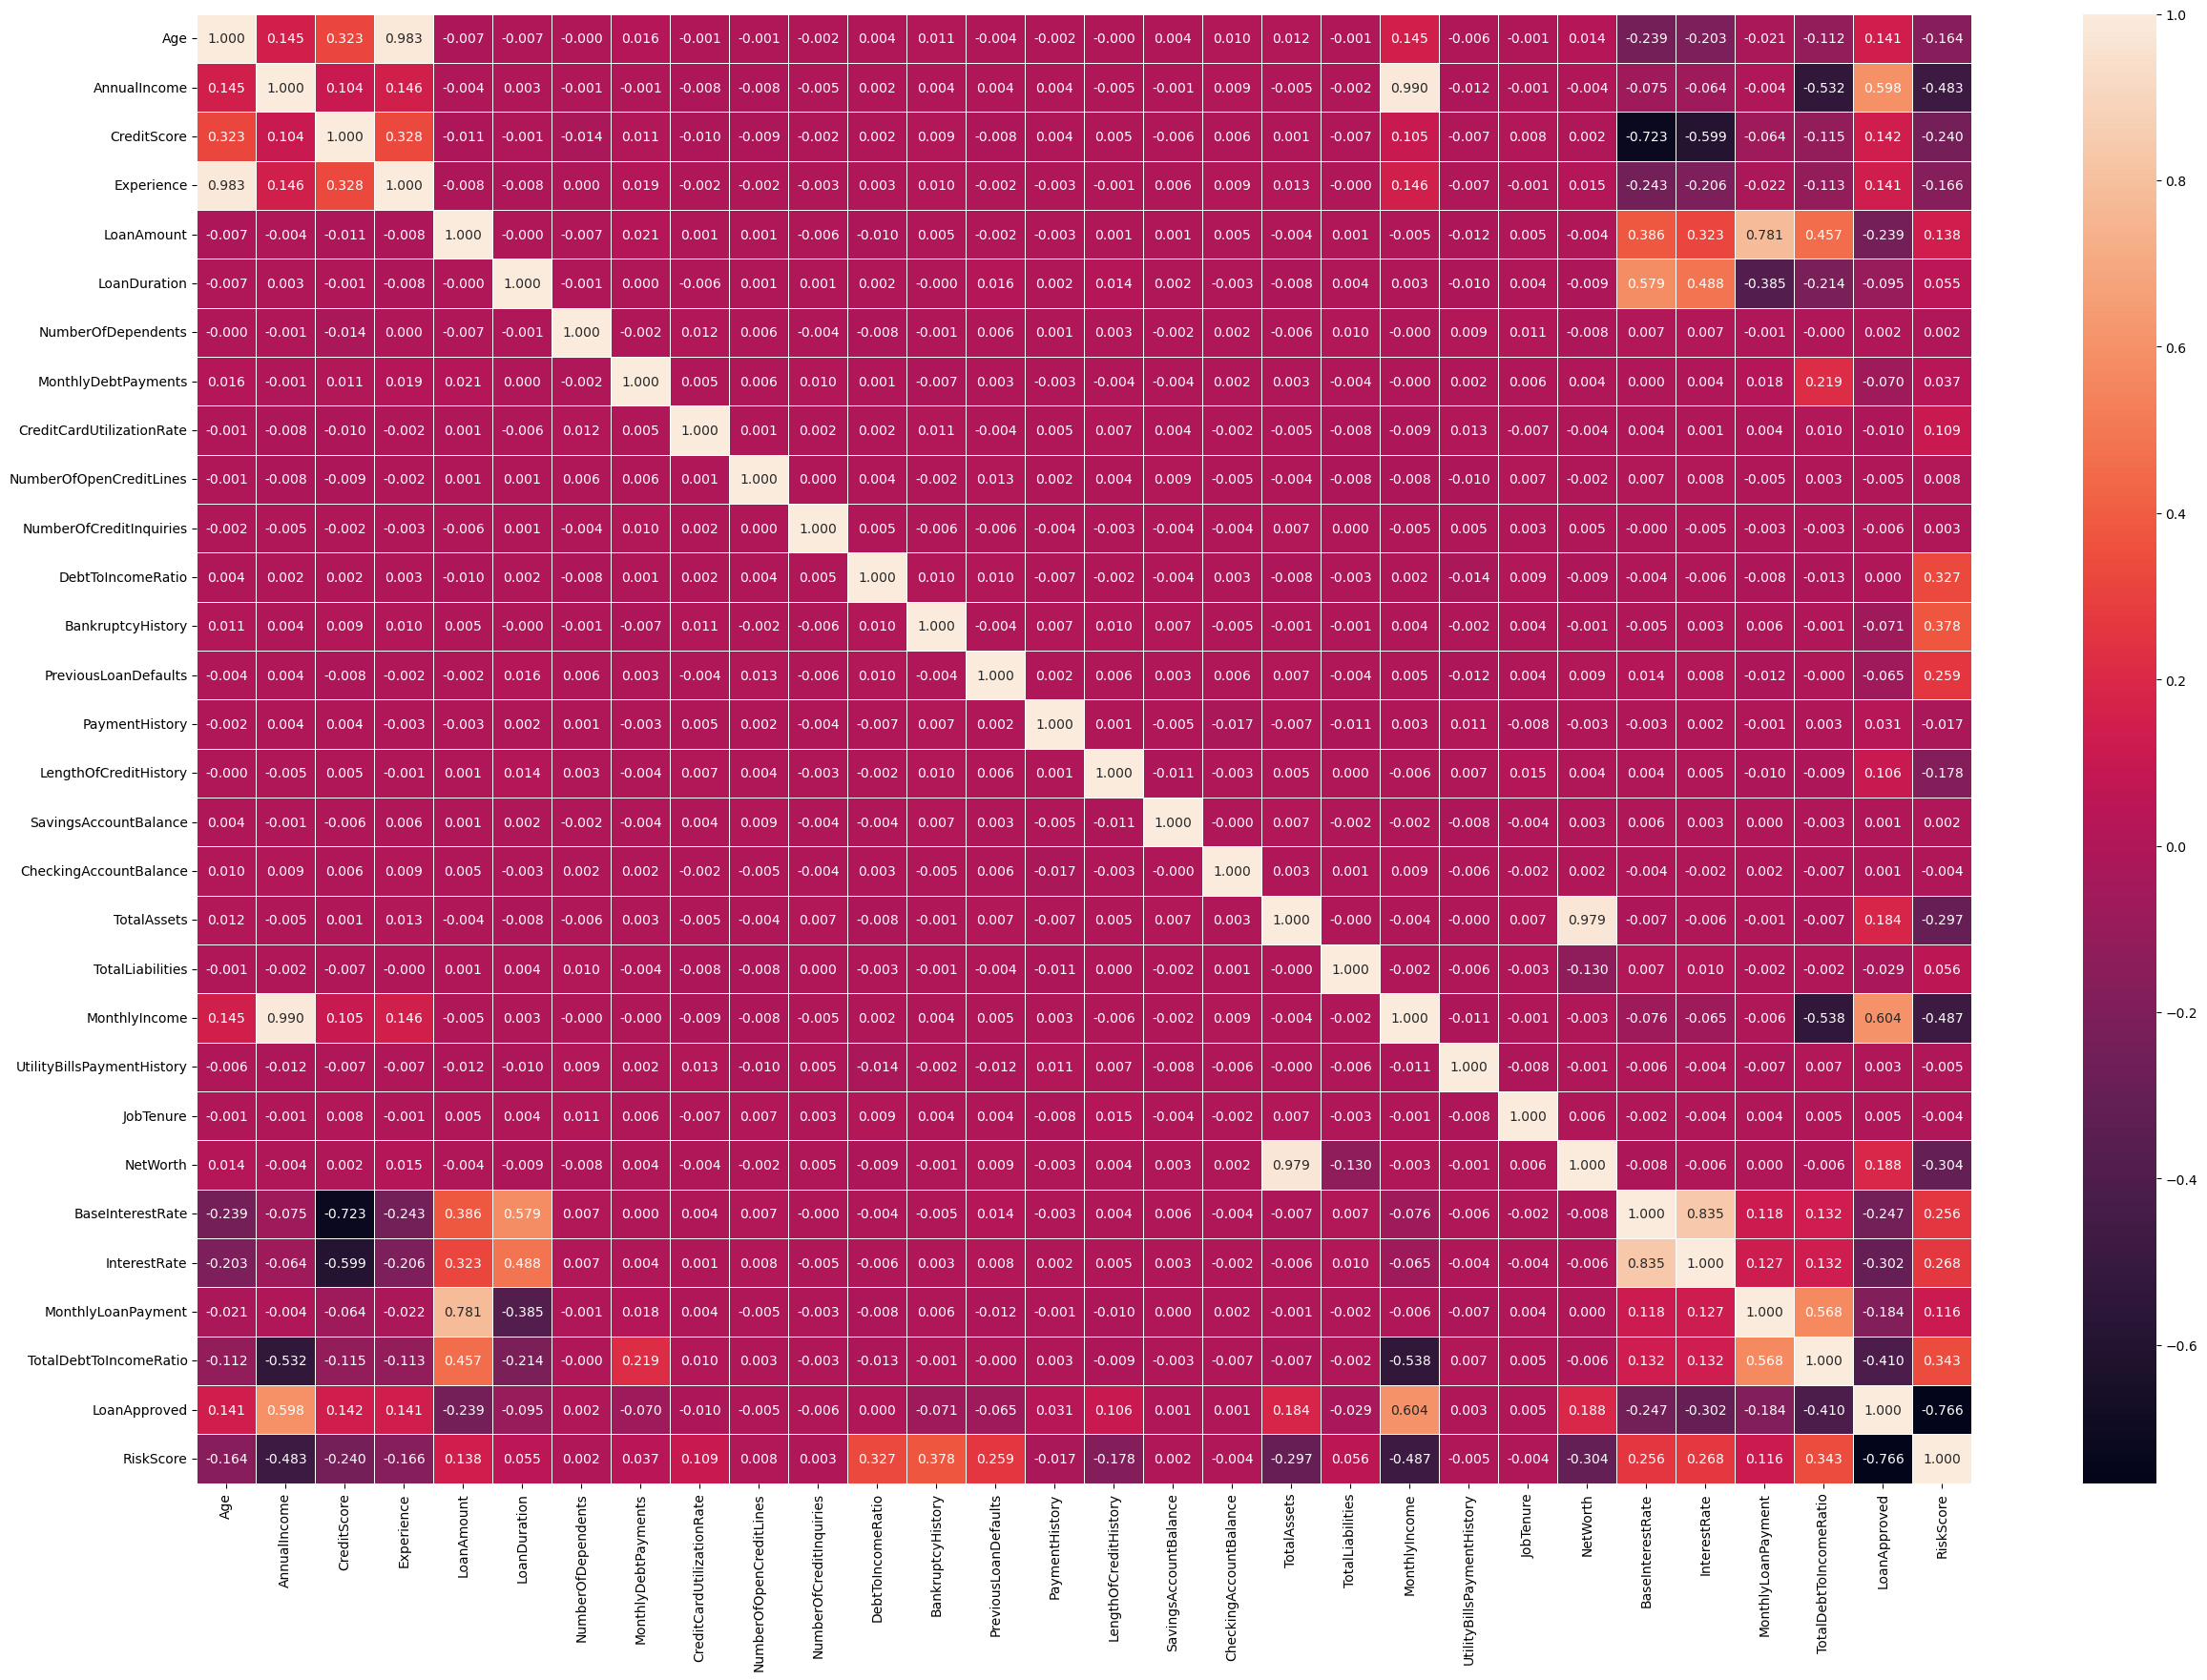

In [66]:
# Feature Correlation map
corr_matrix = raw_df.select_dtypes(include='number').corr()

plt.figure(figsize=[30, 20])
sns.heatmap(corr_matrix,annot=True,linewidth=.5,fmt='.3f')
plt.show()

## Analyze Data Imbalance
Imbalance data:**
In the original dataset, there is an imbalance in the target variable loanapproved, with significantly fewer instances in one of the classes (likely the "approved" or "rejected" class). When we perform a train-test split using stratify=y, we maintain this imbalance proportion in both the training and test sets, ensuring the test set accurately reflects the original class distribution.

However, training a model on imbalanced data can lead to biased predictions, favoring the majority class. To address this, we apply Synthetic Minority Over-sampling Technique (SMOTE) to the training data. SMOTE generates synthetic examples for the minority class by interpolating between existing minority samples, effectively balancing the class distribution in the training set.

In this case, applying SMOTE increased the training set size from the original 16,000 samples to over 24,000 samples. This increase results from adding synthetic examples for the minority class until it matches the number of majority samples, thus enhancing the model's ability to learn from both classes equally.


In [67]:
X=df.drop(columns=['loanapproved'])#assign x values
y=df['loanapproved']#assign y values 

#Perform stratified train-test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=random_state)

print(X_train.shape) 
print(y_train.shape)
#Apply SMOTE on the training data
smote = SMOTE(random_state=random_state)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


(16000, 42)
(16000,)


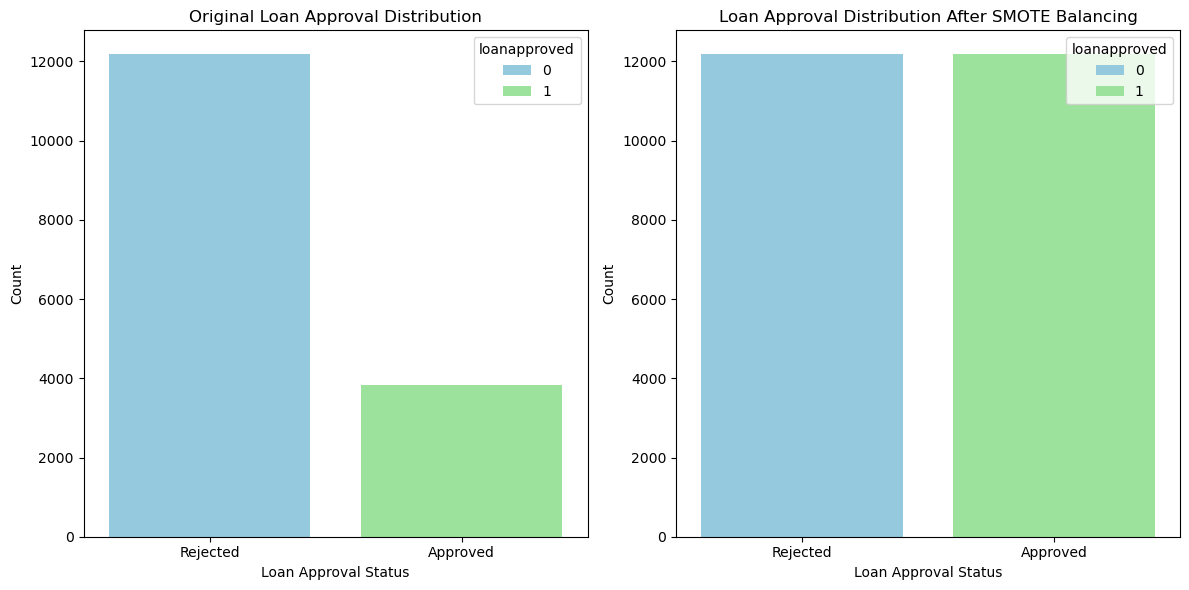

In [68]:
# Define the colors for rejection (orange) and approval (green)
colors = ['skyblue', 'lightgreen']
# colors = {'Rejected': 'orange', 'Approved': 'green'}

# Plot
plt.figure(figsize=(12, 6))

# Original distribution
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, hue=y_train, palette=colors, dodge=False)
plt.title("Original Loan Approval Distribution")
plt.xticks(ticks=[0, 1], labels=['Rejected', 'Approved'])
plt.xlabel('Loan Approval Status')
plt.ylabel('Count')

# SMOTE distribution
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_smote, hue=y_train_smote, palette=colors,  dodge=False)
plt.title("Loan Approval Distribution After SMOTE Balancing")
plt.xticks(ticks=[0, 1], labels=['Rejected', 'Approved'])
plt.xlabel('Loan Approval Status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [69]:
train_df = pd.concat([X_train_smote, y_train_smote], axis=1)
display(train_df.shape)

(24352, 43)

In [70]:
df = train_df.copy()

[🔼 Back to Table of Contents](#table-of-contents)


##  Data Scaling
Scaling is an essential preprocessing step, especially when features have different ranges and magnitudes. In this process, we apply `StandardScaler`, which standardizes features by removing the mean and scaling to unit variance. This transformation is particularly useful for machine learning algorithms that are sensitive to feature scales, such as gradient descent-based methods or distance-based models like K-nearest neighbors.

**Step-by-Step Scaling Process:**
- **Separate Numeric Data:** Only numeric features are scaled, as scaling categorical or non-numeric data is generally unnecessary and could distort information.
- **Apply Standard Scaling:** Using `StandardScaler`, the numeric data is transformed to have a mean of 0 and a standard deviation of 1, making the dataset more homogeneous in scale.
- **Combine with Non-Numeric Data:** The scaled numeric data is then combined back with non-numeric columns, creating a single dataset with uniformly scaled features alongside the original non-numeric data.

This approach improves model performance and interpretability, ensuring no feature disproportionately influences the analysis due to its scale.


In [71]:
# Apply StandardScaler to x_train_smote
columns_to_scale=['age','annualincome','creditscore','experience','loanamount','loanduration','numberofdependents',
                  'monthlydebtpayments','creditcardutilizationrate','numberofopencreditlines','numberofcreditinquiries',
                  'debttoincomeratio','paymenthistory','lengthofcredithistory','savingsaccountbalance',
                  'checkingaccountbalance','totalassets','totalliabilities','monthlyincome','utilitybillspaymenthistory',
                  'jobtenure','networth','baseinterestrate','interestrate','monthlyloanpayment','totaldebttoincomeratio', 
                  'riskscore']

scaler = StandardScaler()
X_scaled = scaler.fit_transform( X_train_smote[columns_to_scale])

#converting X_scaled back to dataframe
X_scaled_df=pd.DataFrame(X_scaled, columns=columns_to_scale)

#joining scaled dataframe to categirial columns
X_scaled = pd.concat([X_scaled_df, X_train_smote.drop(columns_to_scale, axis=1)], axis=1)



In [72]:
X_scaled.head()
print(X_scaled.shape)

(24352, 42)


[🔼 Back to Table of Contents](#table-of-contents)



### Additional preprocessing needs
Beyond handling missing values, encoding, addressing data imbalance, and scaling features, additional preprocessing steps may be required to prepare the dataset effectively for modeling. These steps ensure that all data is in an optimal format and contributes positively to model accuracy and interpretability. Potential additional steps include:

* Outlier Detection and Handling: Outliers can skew model results, Identifying outliers using statistical methods or visualization can help in deciding whether to retain, modify, or remove these data points.

* Feature Engineering: Creating new features based on domain knowledge can enhance the dataset’s predictive power. 

* Feature Selection: Reducing the dimensionality of the dataset by selecting the most relevant features can simplify the model and enhance interpretability, while also preventing overfitting.

By implementing these additional preprocessing steps as needed, we ensure the dataset is thoroughly prepared for downstream tasks, improving both the robustness and accuracy of predictive models.


#### Categorical Variables Exploration

 Each chart compares categories like education, job type, or marital status with loan outcomes. The bars let us see which groups tend to get more approvals and which face more rejections. This helps us understand patterns in the data and see which factors might influence loan approval. 

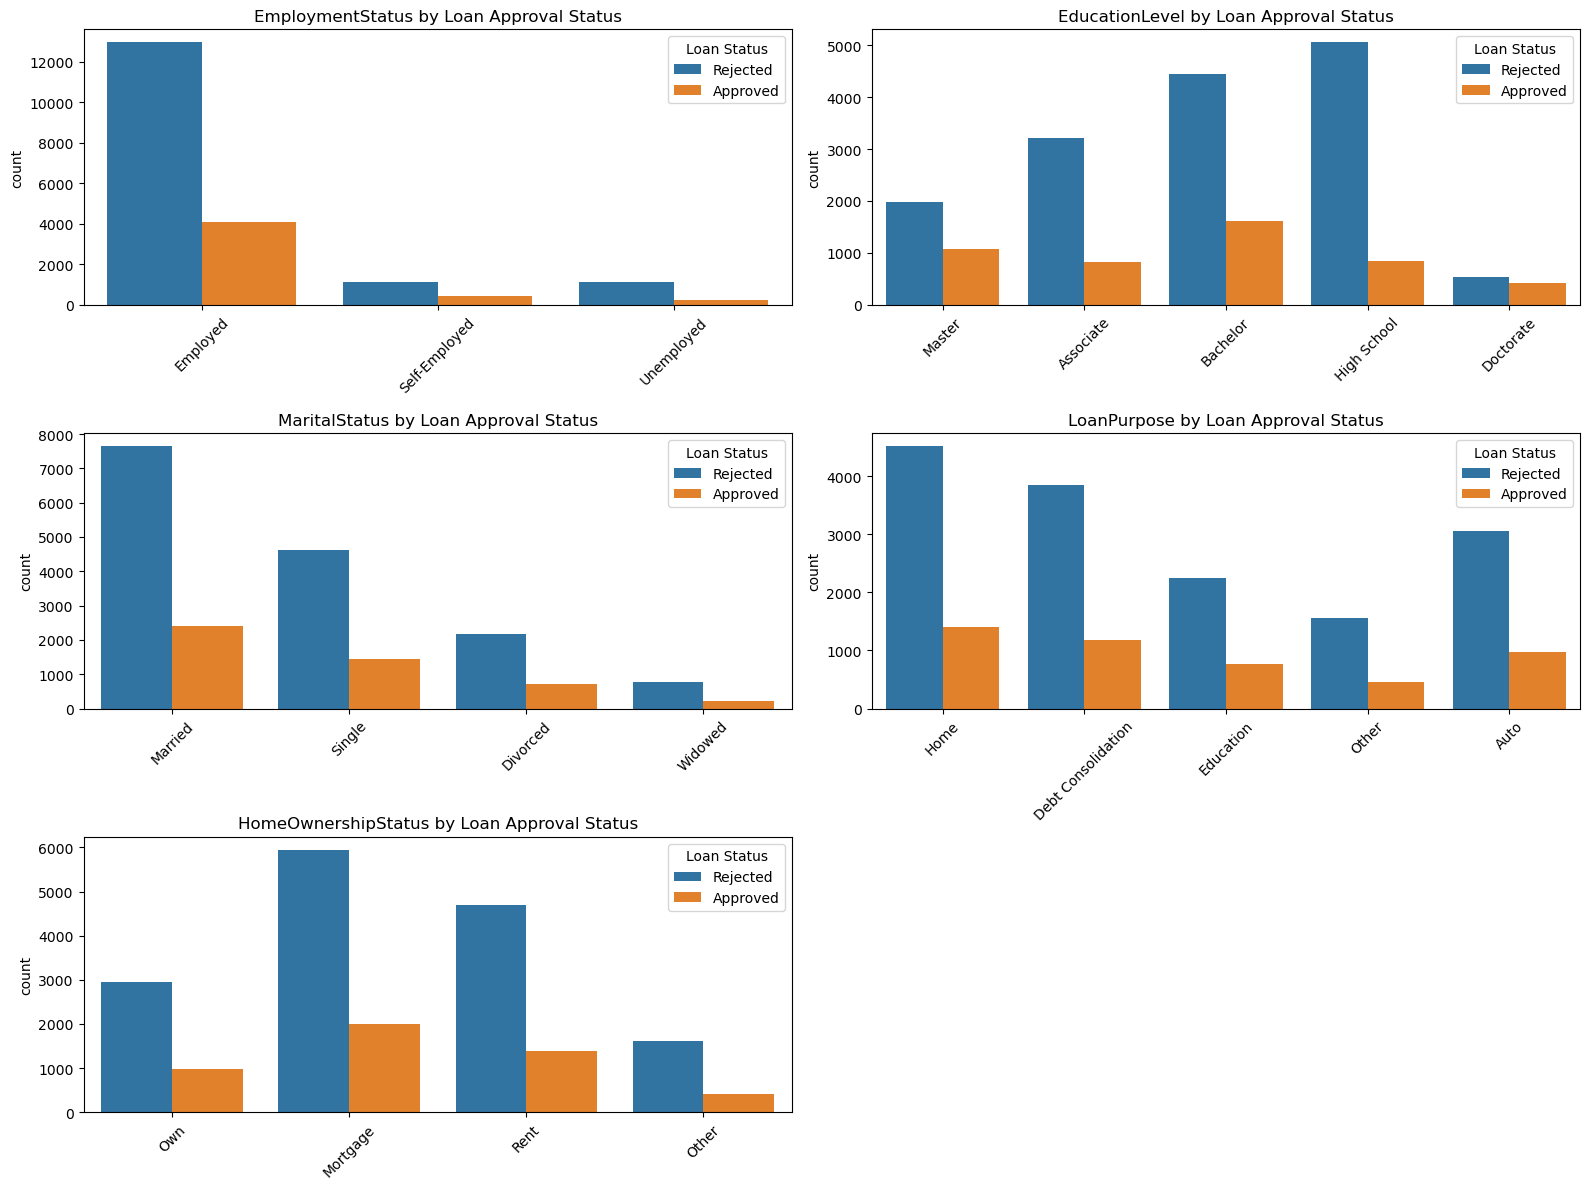

In [73]:
# List of categorical columns to plot
cols = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'LoanPurpose', 'HomeOwnershipStatus']

# Define the number of rows and columns for the subplot
n_cols = 2
n_rows = (len(cols) + n_cols - 1) // n_cols  # To accommodate all plots

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each countplot in the appropriate subplot
for i, col in enumerate(cols):
    sns.countplot(x=col, data=raw_df, hue='LoanApproved', ax=axes[i])
    axes[i].set_title(f'{col} by Loan Approval Status')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('')

    # Fix legend labels: map 1 → Approved, 0 → Rejected
    handles, labels = axes[i].get_legend_handles_labels()
    new_labels = ['Rejected' if lbl == '0' else 'Approved' for lbl in labels]
    axes[i].legend(handles, new_labels, title='Loan Status')

# Hide any empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


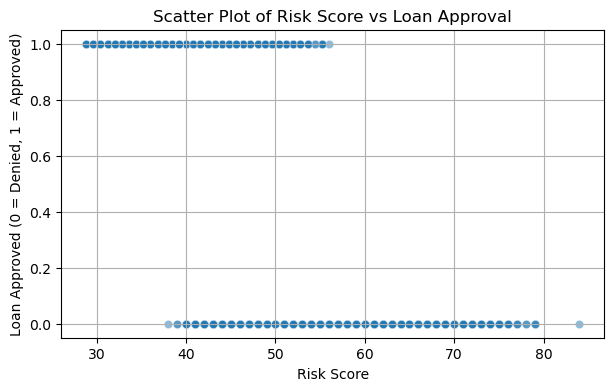

In [74]:
# Set up the figure size
plt.figure(figsize=(7, 4))

# Create the scatter plot
sns.scatterplot(data=raw_df, x='RiskScore', y='LoanApproved', alpha=0.5)

# Customize the plot
plt.title('Scatter Plot of Risk Score vs Loan Approval')
plt.xlabel('Risk Score')
plt.ylabel('Loan Approved (0 = Denied, 1 = Approved)')
plt.grid(True)

# Show the plot
plt.show()


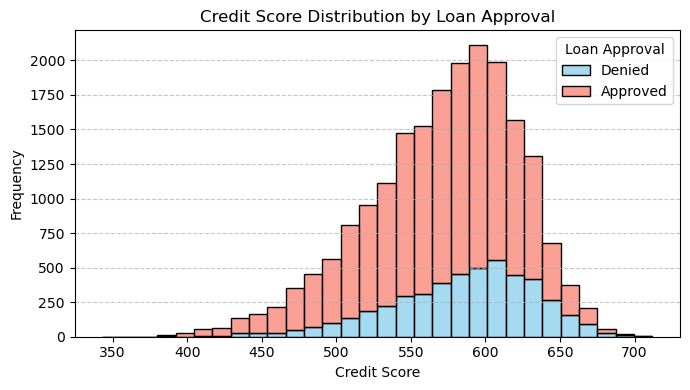

In [75]:
# Set the figure size
plt.figure(figsize=(7, 4))

# Create the histogram with stacked bars for LoanApproved = 0 and 1
sns.histplot(data=raw_df, x='CreditScore', hue='LoanApproved', multiple='stack', bins=30, palette={0: 'salmon', 1: 'skyblue'})

# Add titles and labels
plt.title('Credit Score Distribution by Loan Approval')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.legend(title='Loan Approval', labels=['Denied', 'Approved'])

# Display the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


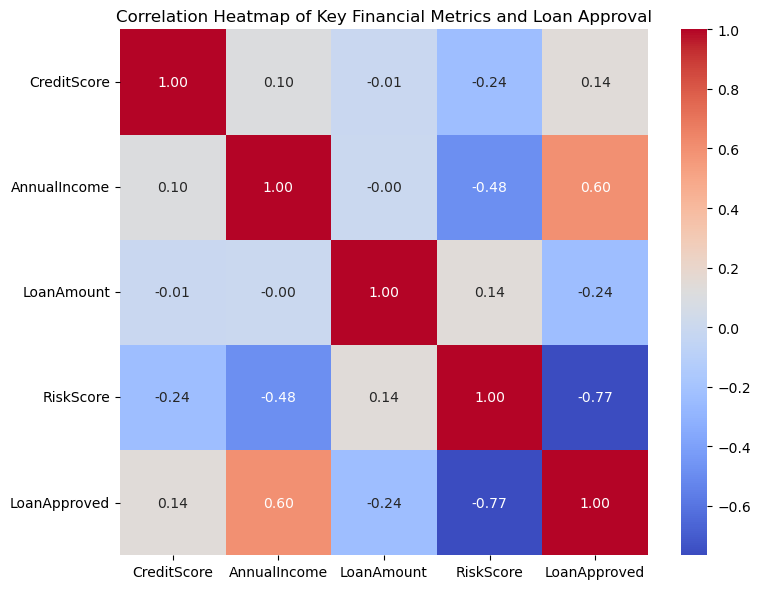

In [76]:
# Define the subset of relevant financial columns
financial_columns = ['CreditScore', 'AnnualIncome', 'LoanAmount', 'RiskScore', 'LoanApproved']
financial_data = raw_df[financial_columns]

# Calculate the correlation matrix
correlation_matrix = financial_data.corr()

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Add title
plt.title('Correlation Heatmap of Key Financial Metrics and Loan Approval')

# Display the plot
plt.tight_layout()
plt.show()


## Modeling

### Logistic Regression

First model we use simple logistic regression that is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not. Our LoanApproved (response variable) is a binary variable so we will use logistic regression as out baseline model

In [77]:
#fitting logistic regression with cross validation
logistic_regression = LogisticRegressionCV(Cs=1, fit_intercept=True, cv=10, penalty='l1', scoring="accuracy", 
                                      solver='liblinear', max_iter=1000, random_state=109).fit(X_train,y_train)

In [78]:
# Make predictions on the train dataset
y_pred = logistic_regression.predict(X_train)

# Calculate the F1 score on train dataset
f1 = f1_score(y_train, y_pred, average='weighted')  # Use 'weighted' for multi-class classification

y_pred_train = logistic_regression.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)


# Predict on test data
y_pred_test = logistic_regression.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)



In [79]:
# adding score in dictionary
results={
        "Model": "Logistic Regression",
        "Train Accuracy":train_accuracy,
        "Train F1 Score": train_f1,
        "Test Accuracy" : test_accuracy,
        "Test F1 Score" : test_f1
         
         
}
Results.append(results)

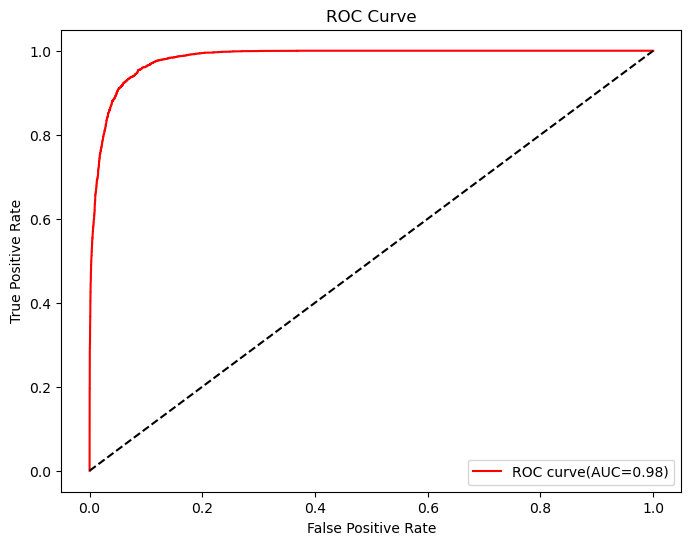

In [80]:
#predicting predicted probability
y_pred_prob=logistic_regression.predict_proba(X_train)[:,1]

#finding roc and auc
fpr,tpr,thresholds=roc_curve(y_train, y_pred_prob)
roc_auc=auc(fpr,tpr)

#plotting curve
plt.figure(figsize=(8,6))

plt.plot(fpr,tpr,color="red", label= f'ROC curve(AUC={roc_auc:.2f})') #plotting curve

plt.plot([0,1],[0,1],color='black', linestyle='--') #random classifier line

#labels for graph
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title( 'ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Random Forest

In [81]:



rf= RandomForestClassifier(oob_score=True,random_state=42)
 
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [None, 10, 20, 30]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                
    n_jobs=-1,          
    scoring='accuracy',  
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Best estimator
best_rf = grid_search.best_estimator_

# Predict on training data
y_pred_train = best_rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)


# Predict on test data
y_pred_test = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)



Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 300}


In [82]:
# Predict on test data
y_pred_test = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)



In [83]:

# adding score in dictionary
results={
        "Model": "Random Forest",
        "Train Accuracy":train_accuracy,
        "Train F1 Score": train_f1,
        "Test Accuracy" : test_accuracy,
        "Test F1 Score" : test_f1
         
         
}
Results.append(results)

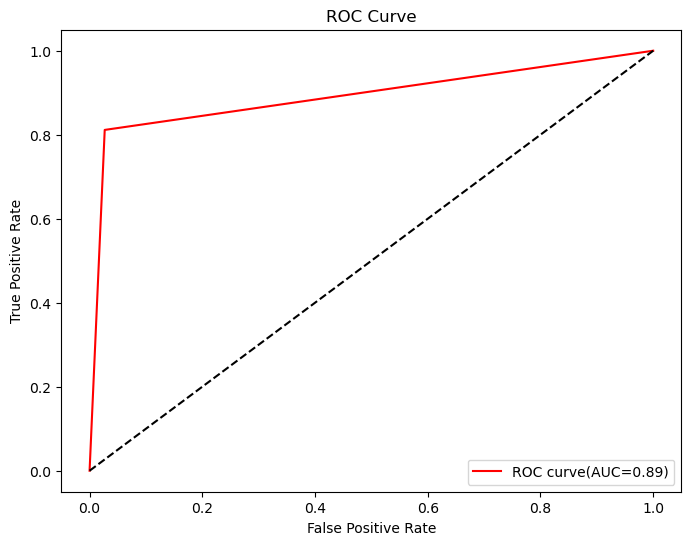

In [84]:
#predicting predicted probability
y_pred_prob=best_rf.predict_proba(X_train)[:,1]

#finding roc and auc
fpr,tpr,thresholds=roc_curve(y_train, y_pred)
roc_auc=auc(fpr,tpr)

#plotting curve
plt.figure(figsize=(8,6))

plt.plot(fpr,tpr,color="red", label= f'ROC curve(AUC={roc_auc:.2f})') #plotting curve

plt.plot([0,1],[0,1],color='black', linestyle='--') #random classifier line

#labels for graph
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title( 'ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Support Vector Machine

In [85]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# Creating model
svm_model = SVC(kernel='rbf', random_state=42)

# Fitting model
svm_model.fit(X_train, y_train)

# Predictions
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

# Train scores
train_accuracy = accuracy_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)


# Test scores
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)



In [86]:
# adding score in dictionary
results={
        "Model": "SVC",
        "Train Accuracy":train_accuracy,
        "Train F1 Score": train_f1,
        "Test Accuracy" : test_accuracy,
        "Test F1 Score" : test_f1
         
         
}
Results.append(results)

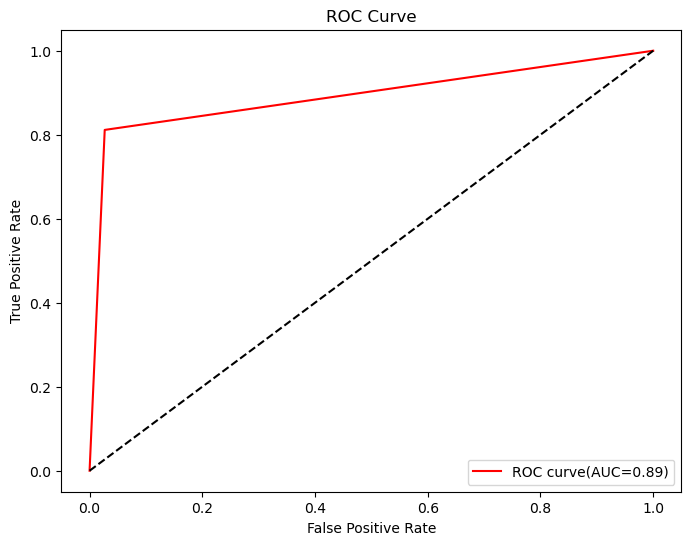

In [87]:
#predicting predicted probability
y_pred_prob=best_rf.predict_proba(X_train)[:,1]

#finding roc and auc
fpr,tpr,thresholds=roc_curve(y_train, y_pred)
roc_auc=auc(fpr,tpr)

#plotting curve
plt.figure(figsize=(8,6))

plt.plot(fpr,tpr,color="red", label= f'ROC curve(AUC={roc_auc:.2f})') #plotting curve

plt.plot([0,1],[0,1],color='black', linestyle='--') #random classifier line

#labels for graph
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title( 'ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Results



In [92]:
Results_df=pd.DataFrame(Results)
Results_df

,Model,Train Accuracy,Train F1 Score,Test Accuracy,Test F1 Score
0,Logistic Regression,0.934500,0.735484,0.93975,0.866924
1,Random Forest,1.000000,1.000000,0.99000,0.978947
2,SVC,0.884687,0.735484,0.89025,0.744023


Random Forest has good test and train accuracy so we will choose Random forest from all of the above models